In [1]:
# 1. Prologue: an atomistic view of electrical resistance

In [2]:
## 1.4 Potentail profile

In [3]:
from pylab import *
#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34
q=1.602e-19
I0=q*q/hbar

#Parameters
U0=0.025
kT=0.025
mu=0
ep=0.2
g1=0.005
g2=0.005
g=g1+g2
alphag=1
alphad=0.5

#Energy grid
NE=501
E=linspace(-1,1,NE)
dE=E[1]-E[0]
D=(g/(2*pi))/((E**2)+((g/2)**2))#Lorentzian Density of states per eV
D=D/(dE*sum(D)) #Normalizing to one

#Bias
IV=101
VV=linspace(0,1,IV)

#Initializing arrays
N=zeros((IV))
I=zeros((IV))

for iV in range(0,IV):
    Vg=0; Vd=VV[iV]; #Vd=0; Vg=VV[iV];
    mu1=mu
    mu2=mu1-Vd
    UL=-(alphag*Vg)-(alphad*Vd)
    U=0 #Self-consistent field
    dU=1
    
    while dU>1e-6:
        f1=1/(1+exp((E+ep+UL+U-mu1)/kT))
        f2=1/(1+exp((E+ep+UL+U-mu2)/kT))
        N[iV]=dE*sum(D*((f1*g1/g)+(f2*g2/g)))
        Unew=U0*N[iV]
        dU=abs(U-Unew)
        U=U+0.1*(Unew-U)
        
    I[iV]=dE*I0*(sum(D*(f1-f2)))*(g1*g2/g)

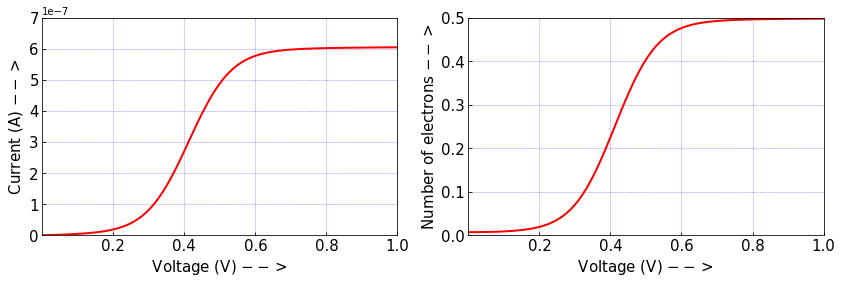

In [4]:
figure(figsize=(14,4))
#figure 1.4.6(a)
subplot(1,2,1)
plot(VV,I,'r',lw=2)
xlabel(' Voltage (V) $-->$ ',fontsize=15)
ylabel(' Current (A) $-->$ ',fontsize=15)
xlim(0,1)
ylim(0,7e-7)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.2,1.2,0.2),fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

#figure 1.4.6(b)
subplot(1,2,2)
plot(VV,N,'r',lw=2)
xlabel(' Voltage (V) $-->$ ',fontsize=15)
ylabel(' Number of electrons $-->$ ',fontsize=15)
xlim(0,1)
ylim(0,0.5)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.2,1.2,0.2),fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)